In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('student.csv')
data.head() #printing the first 5 data from the imported dataset

,regno,name,cgpa
0,1,a,7
1,2,b,8
2,3,c,9
3,4,d,8
4,5,e,9


In [ ]:
data_binary = data[['regno', 'cgpa']]  
data_binary.columns = ['reg', 'grade'] 
data_binary.head() 

,reg,grade
0,1,7
1,2,8
2,3,9
3,4,8
4,5,9


Estimated coefficients:
b_0 = 6.999999999999999            
b_1 = 0.4


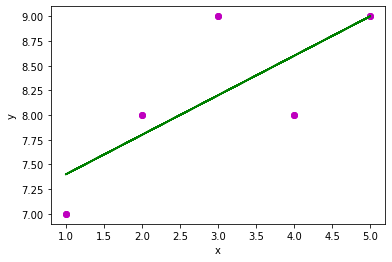

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main():
    # observations / data
    X = np.array(data_binary['reg']).reshape(-1, 1) #independent data 
    y = np.array(data_binary['grade']).reshape(-1, 1) #dependent data
  
    # estimating coefficients
    b = estimate_coef(X, y)
    print("Estimated coefficients:\nb_0 = {}  \\nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(X, y, b)
  
if __name__ == "__main__":
    main()

In [ ]:
from sklearn import datasets, linear_model, metrics

Coefficients:  [[0.42604857]]


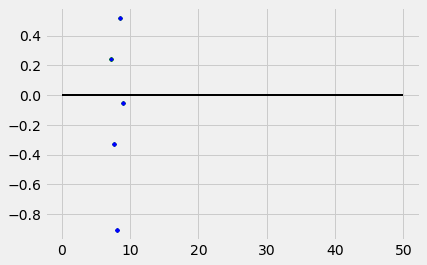

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(data_binary['reg']).reshape(-1, 1) #independent data 
y = np.array(data_binary['grade']).reshape(-1, 1) #dependent data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,color = "green", s = 10, label = 'Train data')

plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)


plt.show()